# Manchester United Anaysis 

# Adam Ruane 

In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

In [2]:
base_url = 'https://understat.com/league/EPL/2020'

# Web-Scraping and Parsing the Data

In [3]:
#Use requests to get the webpage and BeautifulSoup to parse the page ##

## I have already scraped 2006 to 2020 premier league data from website##
##Here is an example of scraping ## 
##I will then append this dataset to my Originally scraped datset ##

## I wanted to test myself by exploring with the data and finding differnt ways to clean and transform it. ##

res = requests.get(base_url)
soup = BeautifulSoup(res.content, 'lxml')
divs = soup.find_all("div")

In [4]:
scripts = soup.find_all('script')

In [5]:
strings = scripts[1].string

In [6]:
#Strip Symbols so I only have Json data ##
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)

In [7]:
pd.Series(data[0],)

id                                                      14086
isResult                                                 True
h           {'id': '228', 'title': 'Fulham', 'short_title'...
a           {'id': '83', 'title': 'Arsenal', 'short_title'...
goals                                    {'h': '0', 'a': '3'}
xG                          {'h': '0.126327', 'a': '2.16287'}
datetime                                  2020-09-12 11:30:00
forecast        {'w': '0.0037', 'd': '0.0476', 'l': '0.9487'}
dtype: object

In [8]:
df = pd.DataFrame(columns=["id", "isResult" ,"h", "a", 'goals', 'xG', 'datetime', 'forecast'])

In [9]:
##Creating the Data Frame using a for loop
for i in range(0,len(data)) :
    currentItem = data[i]
    df.loc[i] = [data[i]["id"], data[i]["isResult"],data[i]["h"],data[i]["a"],data[i]["goals"],data[i]["xG"],data[i]["datetime"],data[i]["forecast"]]

In [10]:
df

,id,isResult,h,a,goals,xG,datetime,forecast
0,14086,True,"{'id': '228', 'title': 'Fulham', 'short_title'...","{'id': '83', 'title': 'Arsenal', 'short_title'...","{'h': '0', 'a': '3'}","{'h': '0.126327', 'a': '2.16287'}",2020-09-12 11:30:00,"{'w': '0.0037', 'd': '0.0476', 'l': '0.9487'}"
1,14087,True,"{'id': '78', 'title': 'Crystal Palace', 'short...","{'id': '74', 'title': 'Southampton', 'short_ti...","{'h': '1', 'a': '0'}","{'h': '1.39569', 'a': '1.26267'}",2020-09-12 14:00:00,"{'w': '0.3916', 'd': '0.3022', 'l': '0.3062'}"
2,14090,True,"{'id': '87', 'title': 'Liverpool', 'short_titl...","{'id': '245', 'title': 'Leeds', 'short_title':...","{'h': '4', 'a': '3'}","{'h': '3.15412', 'a': '0.269813'}",2020-09-12 16:30:00,"{'w': '0.9658', 'd': '0.0296', 'l': '0.0046'}"
3,14091,True,"{'id': '81', 'title': 'West Ham', 'short_title...","{'id': '86', 'title': 'Newcastle United', 'sho...","{'h': '0', 'a': '2'}","{'h': '0.861445', 'a': '1.65911'}",2020-09-12 19:00:00,"{'w': '0.1506', 'd': '0.248', 'l': '0.6014'}"
4,14092,True,"{'id': '76', 'title': 'West Bromwich Albion', ...","{'id': '75', 'title': 'Leicester', 'short_titl...","{'h': '0', 'a': '3'}","{'h': '0.352997', 'a': '2.95581'}",2020-09-13 13:00:00,"{'w': '0.007', 'd': '0.0358', 'l': '0.9572'}"
...,...,...,...,...,...,...,...,...
375,14810,True,"{'id': '87', 'title': 'Liverpool', 'short_titl...","{'id': '78', 'title': 'Crystal Palace', 'short...","{'h': '2', 'a': '0'}","{'h': '2.20348', 'a': '0.772317'}",2021-05-23 15:00:00,"{'w': '0.7516', 'd': '0.173', 'l': '0.0754'}"
376,14811,True,"{'id': '88', 'title': 'Manchester City', 'shor...","{'id': '72', 'title': 'Everton', 'short_title'...","{'h': '5', 'a': '0'}","{'h': '2.88355', 'a': '1.07258'}",2021-05-23 15:00:00,"{'w': '0.7906', 'd': '0.1483', 'l': '0.0611'}"
377,14812,True,"{'id': '238', 'title': 'Sheffield United', 'sh...","{'id': '92', 'title': 'Burnley', 'short_title'...","{'h': '1', 'a': '0'}","{'h': '0.420006', 'a': '0.558508'}",2021-05-23 15:00:00,"{'w': '0.2153', 'd': '0.467', 'l': '0.3177'}"
378,14813,True,"{'id': '81', 'title': 'West Ham', 'short_title...","{'id': '74', 'title': 'Southampton', 'short_ti...","{'h': '3', 'a': '0'}","{'h': '1.98344', 'a': '1.35179'}",2021-05-23 15:00:00,"{'w': '0.5303', 'd': '0.2337', 'l': '0.236'}"


In [11]:
columnsplit=df['h'].apply(pd.Series)

In [12]:
columnsplit['title']

0                       Fulham
1               Crystal Palace
2                    Liverpool
3                     West Ham
4         West Bromwich Albion
                ...           
375                  Liverpool
376            Manchester City
377           Sheffield United
378                   West Ham
379    Wolverhampton Wanderers
Name: title, Length: 380, dtype: object

In [13]:
df['Home_Club'] = columnsplit['title']

In [14]:
columnsplitaway=df['a'].apply(pd.Series)
columnsplitaway['title']

0                Arsenal
1            Southampton
2                  Leeds
3       Newcastle United
4              Leicester
             ...        
375       Crystal Palace
376              Everton
377              Burnley
378          Southampton
379    Manchester United
Name: title, Length: 380, dtype: object

In [15]:
df['Away_Club'] = columnsplitaway['title']

In [16]:
new_df = df[['Home_Club', 'Away_Club', 'goals']]

In [17]:
splitgoals = new_df['goals'].apply(pd.Series)

In [18]:
home_goals= splitgoals['h']
away_goals= splitgoals['a']
new_df['home_goals'] = home_goals
new_df['away_goals'] = away_goals
new_df

<ipython-input-18-c03b0794e47a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['home_goals'] = home_goals
<ipython-input-18-c03b0794e47a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['away_goals'] = away_goals


,Home_Club,Away_Club,goals,home_goals,away_goals
0,Fulham,Arsenal,"{'h': '0', 'a': '3'}",0,3
1,Crystal Palace,Southampton,"{'h': '1', 'a': '0'}",1,0
2,Liverpool,Leeds,"{'h': '4', 'a': '3'}",4,3
3,West Ham,Newcastle United,"{'h': '0', 'a': '2'}",0,2
4,West Bromwich Albion,Leicester,"{'h': '0', 'a': '3'}",0,3
...,...,...,...,...,...
375,Liverpool,Crystal Palace,"{'h': '2', 'a': '0'}",2,0
376,Manchester City,Everton,"{'h': '5', 'a': '0'}",5,0
377,Sheffield United,Burnley,"{'h': '1', 'a': '0'}",1,0
378,West Ham,Southampton,"{'h': '3', 'a': '0'}",3,0


In [19]:
finaldf = new_df[['Home_Club', 'Away_Club', 'home_goals', 'away_goals']]

In [22]:
##Creating the record
    finaldf.loc[finaldf['home_goals'] > finaldf['away_goals'], 'RESULT'] = 'H'
finaldf.loc[finaldf['home_goals'] == finaldf['away_goals'], 'RESULT'] = 'D'
finaldf.loc[finaldf['home_goals'] < finaldf['away_goals'], 'RESULT'] = 'A'

In [23]:
finaldf['season'] = '2020/2021'

In [24]:
finaldf

,Home_Club,Away_Club,home_goals,away_goals,RESULT,season
0,Fulham,Arsenal,0,3,A,2020/2021
1,Crystal Palace,Southampton,1,0,H,2020/2021
2,Liverpool,Leeds,4,3,H,2020/2021
3,West Ham,Newcastle United,0,2,A,2020/2021
4,West Bromwich Albion,Leicester,0,3,A,2020/2021
...,...,...,...,...,...,...
375,Liverpool,Crystal Palace,2,0,H,2020/2021
376,Manchester City,Everton,5,0,H,2020/2021
377,Sheffield United,Burnley,1,0,H,2020/2021
378,West Ham,Southampton,3,0,H,2020/2021


In [25]:
finaldf['home_team'] = finaldf['Home_Club']
finaldf['away_team'] = finaldf['Away_Club']
finaldf['result'] = finaldf['RESULT']

In [27]:
newepldata = finaldf[['season','home_team', 'away_team', 'result']]
Manu = newepldata['home_team'] == 'Manchester United'
manutd = newepldata[Manu]
manutd

,season,home_team,away_team,result
10,2020/2021,Manchester United,Crystal Palace,A
36,2020/2021,Manchester United,Tottenham,A
51,2020/2021,Manchester United,Chelsea,D
64,2020/2021,Manchester United,Arsenal,A
81,2020/2021,Manchester United,West Bromwich Albion,H
110,2020/2021,Manchester United,Manchester City,D
133,2020/2021,Manchester United,Leeds,H
153,2020/2021,Manchester United,Wolverhampton Wanderers,H
156,2020/2021,Manchester United,Aston Villa,H
193,2020/2021,Manchester United,Sheffield United,A


In [41]:
wins = manutd['result'] == 'H'
losses = manutd['result'] == 'A' 

In [42]:
newstat = manutd[wins].groupby('season').count()
newstat1 = manutd[losses].groupby('season').count()
newstat['Team']= 'Manchester United'
newstat1['Team']= 'Manchester United'

In [43]:
newstat['wins'] = newstat['result']
newstat['losses'] = newstat1['result']

In [44]:

homerecord = newstat[['Team', 'wins' ,'losses']]
homerecord

,Team,wins,losses
season,,,
2020/2021,Manchester United,9,6


In [40]:
Manuaway = newepldata['away_team'] == 'Manchester United'
manutdaway = newepldata[Manuaway]
manutdaway

,season,home_team,away_team,result
18,2020/2021,Brighton,Manchester United,A
41,2020/2021,Newcastle United,Manchester United,A
70,2020/2021,Everton,Manchester United,A
93,2020/2021,Southampton,Manchester United,A
100,2020/2021,West Ham,Manchester United,A
126,2020/2021,Sheffield United,Manchester United,A
137,2020/2021,Leicester,Manchester United,D
166,2020/2021,Burnley,Manchester United,A
176,2020/2021,Liverpool,Manchester United,D
182,2020/2021,Fulham,Manchester United,A


In [51]:
awaywins = manutdaway['result'] == 'A'
awaylosses = manutdaway['result'] == 'H' 

In [52]:
newstataway = manutdaway[awaywins].groupby('season').count()
newstataway1 = manutdaway[awaylosses].groupby('season').count()
newstataway['Team']= 'Manchester United'
newstataway1['Team']= 'Manchester United'

In [53]:
newstataway['wins'] = newstataway['result']
newstataway['losses'] = newstataway1['result']

In [57]:

awayrecord = newstataway[['Team', 'wins' ,'losses']]
awayrecord.fillna(0)

,Team,wins,losses
season,,,
2020/2021,Manchester United,12,0.0


In [60]:
merge = homerecord.merge(awayrecord, how='left', on = 'season')
merge1= merge.fillna(0)
merge1

,Team_x,wins_x,losses_x,Team_y,wins_y,losses_y
season,,,,,,
2020/2021,Manchester United,9,6,Manchester United,12,0.0


In [63]:
merge1['totalwins'] = merge1['wins_x'] + merge1['wins_y']
merge1['totallosses'] = merge1['losses_x'] + merge1['losses_y']

In [64]:
merge1

,Team_x,wins_x,losses_x,Team_y,wins_y,losses_y,totalwins,totallosses
season,,,,,,,,
2020/2021,Manchester United,9,6,Manchester United,12,0.0,21,6.0


In [67]:
merge1['homewins'] = merge1['wins_x']
merge1['awaywins'] = merge1['wins_y']
merge1['homelosses'] = merge1['losses_x']
merge1['awaylosses'] = merge1['losses_y']
merge1['Team'] = merge1['Team_x']

In [68]:
manutable = merge1[['Team', 'homewins' ,'homelosses', 'awaywins', 'awaylosses', 'totalwins', 'totallosses']]

In [69]:
manutable

,Team,homewins,homelosses,awaywins,awaylosses,totalwins,totallosses
season,,,,,,,
2020/2021,Manchester United,9,6,12,0.0,21,6.0


In [71]:
df3 = pd.read_excel(r'c:/Users/Adam/Downloads/manuscrapeallyears.xlsx')
print (df3)

    Unnamed: 0     season               Team  homewins  homelosses  awaywins  \
0            0  2006-2007  Manchester United        15           2        13   
1            1  2007-2008  Manchester United        17           1        10   
2            2  2008-2009  Manchester United        16           1        12   
3            3  2009-2010  Manchester United        16           2        11   
4            4  2010-2011  Manchester United        18           0         5   
5            5  2011-2012  Manchester United        15           2        13   
6            6  2012-2013  Manchester United        16           3        12   
7            7  2013-2014  Manchester United         9           7        10   
8            8  2014-2015  Manchester United        14           3         6   
9            9  2015-2016  Manchester United        12           2         7   
10          10  2016-2017  Manchester United         8           1        10   
11          11  2017-2018  Manchester Un

df3

In [72]:
manutablenew = manutable.reset_index()

In [73]:
df3.head(5)

,Unnamed: 0,season,Team,homewins,homelosses,awaywins,awaylosses,totalwins,totallosses
0,0,2006-2007,Manchester United,15,2,13,3,28,5
1,1,2007-2008,Manchester United,17,1,10,4,27,5
2,2,2008-2009,Manchester United,16,1,12,3,28,4
3,3,2009-2010,Manchester United,16,2,11,5,27,7
4,4,2010-2011,Manchester United,18,0,5,4,23,4


In [77]:
append = df3.append(manutablenew)

In [79]:
append.fillna(14)

,Unnamed: 0,season,Team,homewins,homelosses,awaywins,awaylosses,totalwins,totallosses
0,0.0,2006-2007,Manchester United,15,2,13,3.0,28,5.0
1,1.0,2007-2008,Manchester United,17,1,10,4.0,27,5.0
2,2.0,2008-2009,Manchester United,16,1,12,3.0,28,4.0
3,3.0,2009-2010,Manchester United,16,2,11,5.0,27,7.0
4,4.0,2010-2011,Manchester United,18,0,5,4.0,23,4.0
5,5.0,2011-2012,Manchester United,15,2,13,3.0,28,5.0
6,6.0,2012-2013,Manchester United,16,3,12,2.0,28,5.0
7,7.0,2013-2014,Manchester United,9,7,10,5.0,19,12.0
8,8.0,2014-2015,Manchester United,14,3,6,5.0,20,8.0
9,9.0,2015-2016,Manchester United,12,2,7,8.0,19,10.0


In [80]:
append.to_excel("newmanutdscrapeddata.xlsx",
             sheet_name='Sheet_name_1')  

In [91]:
 data_winsVseason = append[['totalwins', 'season']] #Extracting out wins for every season.

data_lossVseason = append[['totallosses', 'season']] #Extracting out losses for every season.

 data_homewinsVseason = append[['homewins', 'season']] #Extracting out homewins for every season.

data_homelossVseason = append[['homelosses', 'season']] #Extracting out homelosses for every season.

# VISUALISATIONS 

# MANAGER TREND AT MANCHESTER UNITED 

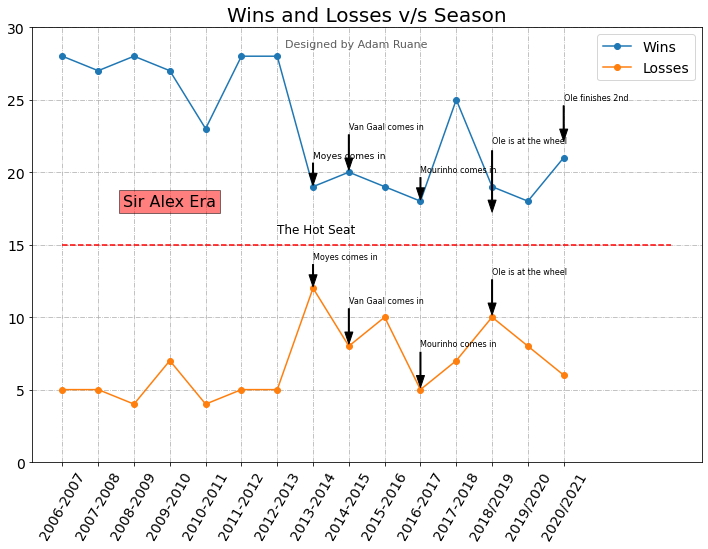

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
#Plotting Wins and Losses v/s Season
plt.rcParams['figure.figsize'] = [12, 8] #creates a graph of 10x7 inches
plt.plot(data_winsVseason.season, data_winsVseason.totalwins, label = 'Wins', marker='o') #plot Wins v Season
plt.plot(data_lossVseason.season, data_lossVseason.totallosses, label = 'Losses', marker='o') 

#plot Loss vs Season, with markers and label
plt.ylim(0,30) #for setting y limits from 15 to 30.
plt.grid(which='major', axis='both', linestyle='-.', linewidth=0.75) #plotting grid. 
plt.xticks(rotation=60, fontsize=14) #rotate x axis labels and increase font.
plt.yticks(fontsize=14) #increase yticks fontsize.
plt.legend(fontsize=14) #show labels as legend
plt.title('Wins and Losses v/s Season', fontsize = 20)
plt.suptitle('Designed by Adam Ruane',  color='#4B4B4B' ,y=.86, fontsize=11, alpha=0.9)

try: #try catch is used because here x-coord is a string like 2006-2007 and hence gives a TypeError. So TypeError errors are overlooked in except statement.


    plt.annotate('The Hot Seat', xy=(6, 15.6),size=12, ha='left', va="bottom")
    x_coordinates = [0, 17] 
    y_coordinates = [15, 15]
    plt.plot(x_coordinates, y_coordinates, color = 'red',linestyle='dashed')
    plt.annotate('Moyes comes in', xy=('2013-2014',19), xytext=('2013-2014', 21),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =9) 
    #For the wins curve. The label is Moyes comes in.
    #xy is the position of marker point. xytext is position of label text. 
    
    
    plt.annotate('Moyes comes in', xy=('2013-2014',12), xytext=('2013-2014', 14),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8) 
    #For losses curve. The label is Moyes comes in.
    
    plt.annotate('Van Gaal comes in', xy=('2014-2015',20), xytext=('2014-2015', 23),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8) 
    #For wins curve when LVG comes in.
    
    plt.annotate('Van Gaal comes in', xy=('2014-2015',8), xytext=('2014-2015', 11),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8)
    #For losses curve when LVG comes in.
    
    plt.annotate('Mourinho comes in', xy=('2016-2017',18), xytext=('2016-2017', 20),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8) 
    #For wins curve when Mou comes in. 
    
    plt.annotate('Mourinho comes in', xy=('2016-2017',5), xytext=('2016-2017', 8),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8) 
    #For losses curve when Mou comes in. 
    plt.annotate('Ole is at the wheel', xy=('2018/2019',17), xytext=('2018/2019', 22),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8)
    plt.annotate('Ole is at the wheel', xy=('2018/2019',10), xytext=('2018/2019', 13),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8) 
    plt.annotate('Ole finishes 2nd', xy=('2020/2021',22), xytext=('2020/2021', 25),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8)
    plt.text('2009-2010',18,'Sir Alex Era', horizontalalignment='center', verticalalignment='center', fontsize =16, bbox=dict(facecolor='red', alpha=0.5)) 
    #For the middle big text
except TypeError: 
    pass

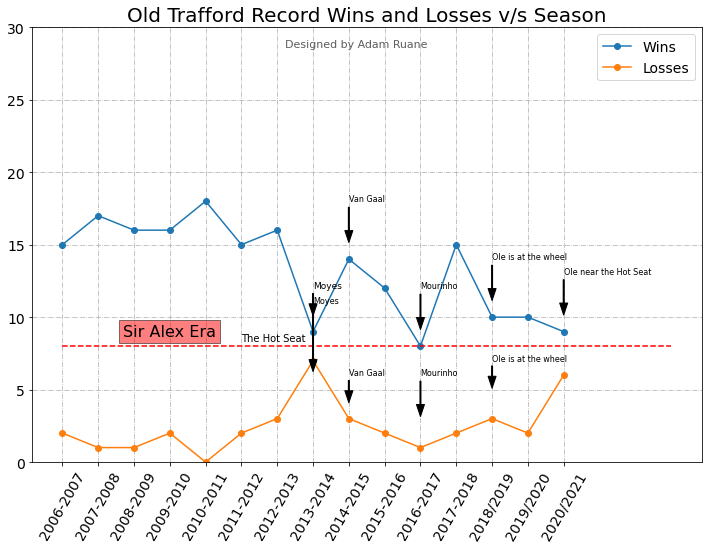

In [97]:
##When looking at the home record, Ole had pretty much the same amount
##but is quite close to the hot seat in terms of losing at OLd Trafford.
## Moyes and Jose had a terrible home record and Van Gaal surprisingly comes out on top for both graphs ##
## Jose did show signs of improvement getting close to ALex's OT Record during his final season.##
## However looking at this, Ole has a long way to go to get to the SAF Level... ##

import matplotlib.pyplot as plt
%matplotlib inline
#Plotting Wins and Losses v/s Season
plt.rcParams['figure.figsize'] = [12, 8] #creates a graph of 10x7 inches
plt.plot(data_homewinsVseason.season, data_homewinsVseason.homewins, label = 'Wins', marker='o') #plot Wins v Season
plt.plot(data_homelossVseason.season, data_homelossVseason.homelosses, label = 'Losses', marker='o') 

#plot Loss vs Season, with markers and label
plt.ylim(0,30) #for setting y limits from 15 to 30.
plt.grid(which='major', axis='both', linestyle='-.', linewidth=0.75) #plotting grid. See pyplot.grid in Google.
plt.xticks(rotation=60, fontsize=14) #rotate x axis labels and increase font.
plt.yticks(fontsize=14) #increase yticks fontsize.
plt.legend(fontsize=14) #show labels as legend
plt.title('Old Trafford Record Wins and Losses v/s Season', fontsize = 20)
plt.suptitle('Designed by Adam Ruane',  color='#4B4B4B' ,y=.86, fontsize=11, alpha=0.9)

try: #try catch is used because here x-coord is a string like 2006-2007 and hence gives a TypeError. So TypeError errors are overlooked in except statement.


    plt.annotate('The Hot Seat', xy=(5, 8.2),size=10, ha='left', va="bottom")
    x_coordinates = [0, 17] 
    y_coordinates = [8, 8]
    plt.plot(x_coordinates, y_coordinates, color = 'red',linestyle='dashed')
    plt.annotate('Moyes', xy=('2013-2014',10), xytext=('2013-2014', 12),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =9) 
    #For the wins curve. The label is Moyes comes in.
    #xy is the position of marker point. xytext is position of label text. 
    
    
    plt.annotate('Moyes', xy=('2013-2014',6), xytext=('2013-2014', 11),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8) 
    #For losses curve. The label is Moyes comes in.
    
    plt.annotate('Van Gaal', xy=('2014-2015',15), xytext=('2014-2015', 18),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8) 
    #For wins curve when LVG comes in.
    
    plt.annotate('Van Gaal', xy=('2014-2015',4), xytext=('2014-2015', 6),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8)
    #For losses curve when LVG comes in.
    
    plt.annotate('Mourinho', xy=('2016-2017',9), xytext=('2016-2017', 12),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8) 
    #For wins curve when Mou comes in. 
    
    plt.annotate('Mourinho', xy=('2016-2017',3), xytext=('2016-2017', 6),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8) 
    #For losses curve when Mou comes in. 
    plt.annotate('Ole is at the wheel', xy=('2018/2019',11), xytext=('2018/2019', 14),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8)
    plt.annotate('Ole is at the wheel', xy=('2018/2019',5), xytext=('2018/2019', 7),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8) 
    plt.annotate('Ole near the Hot Seat', xy=('2020/2021',10), xytext=('2020/2021', 13),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8) 
    
    plt.text('2009-2010',9,'Sir Alex Era', horizontalalignment='center', verticalalignment='center', fontsize =16, bbox=dict(facecolor='red', alpha=0.5)) 
    #For the middle big text
except TypeError: 
    pass